# Data Mining : Microarray Preprocessing

**Authors :**
- Rahmat Hendrawan
- Tita Nurul Nuklianggraita
- Monica Triyani

## Import Packages and Dataset

***Packages***

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import accuracy_score

from ReliefF import ReliefF
from sklearn.decomposition import PCA
# from skrebate import ReliefF

import warnings
warnings.filterwarnings('ignore')

***Dataset***

In [2]:
data = pd.read_csv("data/colonTumor.csv")
data_length = data.shape[1]
data_length

2001

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.read_csv("data/colonTumor.csv", header=None, names=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,atribut2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [5]:
data = data.rename(columns={'atribut2000': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [6]:
data.loc[data['status'] == 'negative', ['status']] = 0
data.loc[data['status'] == 'positive', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,0
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,1
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,1
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,0


## Data Analysis

**Perbandingan jumlah positive dan negative**

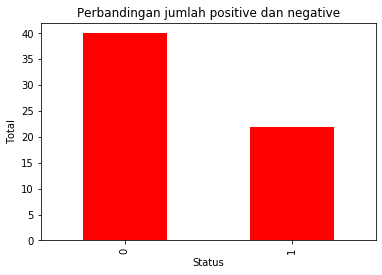

In [7]:
data['status'].value_counts().plot(kind='bar', color="r")
plt.title("Perbandingan jumlah positive dan negative")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

**statistic info**

In [8]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7015.786710,4966.960015,4094.727879,3987.789284,2937.126113,4705.119302,3588.800323,2872.288631,4680.191160,4039.661953,...,100.227903,293.222722,124.653387,133.186935,184.136635,84.118387,114.930000,53.251230,42.965827,0.354839
std,3092.970584,2188.890480,1818.080939,2019.086903,1356.932887,2400.848112,1872.106095,1122.365448,2417.239217,2018.044248,...,78.022712,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175,0.482370
min,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815480,...,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250,0.000000
25%,4877.364700,3408.951150,2763.725900,2648.942875,1890.857125,2843.368775,2112.952150,2050.814025,2971.792775,2797.992525,...,48.409375,161.518125,69.121250,71.637500,85.905059,30.701875,53.881563,27.334375,24.610000,0.000000
50%,6274.612500,4738.280700,3890.338100,3451.498200,2666.075600,4416.617850,3438.180000,2844.960650,4088.735600,3823.017900,...,83.080625,251.883125,114.658125,104.271875,142.578570,56.385625,93.825625,45.358125,34.775000,0.000000
75%,8712.283175,6455.843200,5008.993750,4738.408950,3563.969325,6076.032125,4420.645350,3414.228475,6171.382800,4840.715500,...,117.208438,424.742500,177.730312,149.772188,212.019940,101.231250,145.074062,66.235312,54.697500,1.000000
max,14876.407000,10152.273000,8605.043800,11248.680000,8093.875000,11222.682000,9939.246200,5917.026300,14144.835000,12307.913000,...,438.383750,902.572500,333.418750,464.930000,702.130950,405.600000,390.890000,197.220000,126.826250,1.000000


## Features Target Split

In [9]:
X = data.drop(['status'],axis=1)
y = data['status']

## Normalization

In [10]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_minmax = scaler.fit_transform(X_train_)
    X_train_ = pd.DataFrame(X_train_minmax, columns=X_train_.columns)
    X_test_minmax = scaler.transform(X_test_)
    X_test_ = pd.DataFrame(X_test_minmax, columns=X_test_.columns)
    return X_train_,X_test_

## Feature Selection

### Clustering (K-Means)

In [31]:
def k_means(X_train_):
    X_train_transpose = X_train_.transpose()
    model_kme = KMeans(n_clusters= 6)
    model_kme.fit(X_train_transpose)
    pred_kme = model_kme.predict(X_train_transpose)
    X_train_transpose_clustered = X_train_transpose.copy()
    X_train_transpose_clustered['cluster'] = pred_kme 
    return X_train_transpose_clustered

### Relief Method

In [12]:
def find_column(data_, data_selected, num_features_selected):
    for i in data_.columns:
        if data_[i].values.tolist() == data_selected.iloc[:,num_features_selected].values.tolist():
            column = i
            break
    return column

In [98]:
def relief_method(X_train_transpose_clusteredx, X_train_,y_train_, label_cluster):
    n_features_to_keep = 8
    n_neighbors = X_train_.shape[0]-1
    Train = pd.DataFrame()
    for i in label_cluster:
        X_train_transpose_clustered_ = X_train_transpose_clusteredx[X_train_transpose_clusteredx['cluster']==i]
        X_train_clustered_ = X_train_transpose_clustered_.drop(['cluster'],axis=1).transpose()
        fs = ReliefF(n_neighbors=n_neighbors, n_features_to_keep=n_features_to_keep)
        X_train_selected = fs.fit_transform(X_train_clustered_.values, y_train_)
        top_features = fs.top_features[0:n_features_to_keep]
        for j in top_features:
            if Train.shape == (0,0):
                Train = X_train_[[find_column(X_train_, X_train_clustered_, j)]]
            else:
                Train = Train.join(X_train_[[find_column(X_train_, X_train_clustered_, j)]])
    return Train

### PCA

## Prepare data

In [14]:
def prepare_data(Train_,X_test_):
    X_train_ = Train_.copy()
    X_test_ = X_test_[X_train_.columns]
    return X_train_,X_test_

## Classification

In [53]:
model_rfg = RandomForestClassifier(criterion='gini', n_estimators=60)
model_svm = SVC(kernel='linear')
model_lr = LogisticRegression()

In [16]:
X_ = X.values
y_ = y.values

**K-fold Cross Validation**

In [17]:
kf = KFold(n_splits=8, random_state=20)
kf.get_n_splits(X_)

8

***Random Forest***

In [57]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_rfg.fit(X_train,y_train)
    pred = model_rfg.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_rfg = scoring.mean()
print("avg accuraccy = ",avg_rfg)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Random Forest :  1.0
Score in Random Forest :  0.875
Score in Random Forest :  0.875
Score in Random Forest :  1.0
Score in Random Forest :  1.0
Score in Random Forest :  0.875
Score in Random Forest :  0.5714285714285714
Score in Random Forest :  0.8571428571428571
avg accuraccy =  0.8816964285714286
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


***Support Vector Machine***

In [58]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_svm.fit(X_train,y_train)
    pred = model_svm.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in SVM : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_svm = scoring.mean()
print("avg accuraccy = ",scoring.mean())
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in SVM :  0.75
Score in SVM :  0.875
Score in SVM :  0.875
Score in SVM :  1.0
Score in SVM :  0.875
Score in SVM :  0.875
Score in SVM :  0.5714285714285714
Score in SVM :  1.0
avg accuraccy =  0.8526785714285714
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


***Logistic Regression***

In [59]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_lr.fit(X_train,y_train)
    pred = model_lr.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Logistic Regression : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_lr = scoring.mean()
print("avg accuraccy = ",avg_lr)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Logistic Regression :  0.75
Score in Logistic Regression :  0.75
Score in Logistic Regression :  0.75
Score in Logistic Regression :  1.0
Score in Logistic Regression :  0.875
Score in Logistic Regression :  0.75
Score in Logistic Regression :  0.5714285714285714
Score in Logistic Regression :  0.8571428571428571
avg accuraccy =  0.7879464285714286
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


## Result

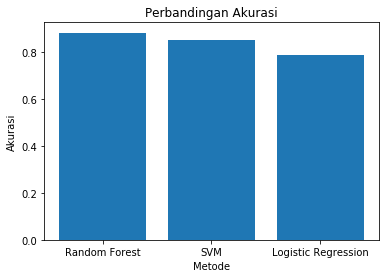

In [61]:
plt.bar(["Random Forest","SVM","Logistic Regression"],[avg_rfg,avg_svm,avg_lr])
plt.title("Perbandingan Akurasi")
plt.xlabel('Metode')
plt.ylabel('Akurasi')
plt.show()

In [103]:
pd.DataFrame({"method":["Random Forest","SVM","Logistic Regression"], "accuracy (AVG)" : [str(round(avg_rfg*100,2))+" %",str(round(avg_svm*100,2))+" %",str(round(avg_lr*100,2))+" %"]})

,method,accuracy (AVG)
0,Random Forest,88.17 %
1,SVM,85.27 %
2,Logistic Regression,78.79 %


**Leave One Out Cross Validation**